<a href="https://colab.research.google.com/github/sruthikoyya/SummerIntership_NITR/blob/main/ResNet50_NITR_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ResNet50 Implementation

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pathlib

In [ ]:
dataset = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
directory = tf.keras.utils.get_file('flower_photos', origin=dataset, untar=True)
data_directory = pathlib.Path(directory)

In [ ]:
#Defining the image size and batch size
img_height,img_width=180,180
batch_size=32

In [ ]:
# Create the training and validation datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 3670 files belonging to 1 classes.
Using 2936 files for training.
Found 3670 files belonging to 1 classes.
Using 734 files for validation.


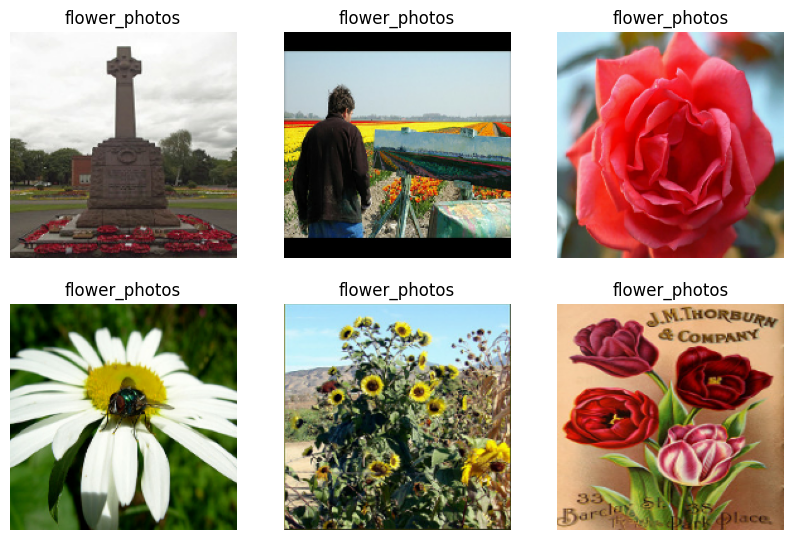

In [ ]:
# Plot some sample images from the dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3,3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

In [ ]:
#Create the ResNet50 model  and set the layers to be non-trainable
resnet_model=Sequential()
pretrained_model=tf.keras.applications.ResNet50(include_top=False,#removes the final classification layer of ResNet50
                                                pooling='avg',#add the pooling layer at last conv layer this is global average pooling to convert 7x7x2048 to 2048
                                                input_shape=(img_height,img_width,3),# our image input size
                                                weights='imagenet'#Loading the pretrained weights
                                                )
for layer in pretrained_model.layers:
  layer.trainable=False
resnet_model.add(pretrained_model)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
##Add fully connected layers for classification
resnet_model.add(layers.Flatten())
resnet_model.add(layers.Dense(512,activation='relu'))
resnet_model.add(layers.Dense(5,activation='softmax'))

In [ ]:
#Compile and train the model
resnet_model.compile(optimizer=Adam(),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
history = resnet_model.fit(train_ds, validation_data=validation_ds, epochs=3)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 404s 4s/step - accuracy: 0.9484 - loss: 0.0956 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 439s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 439s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 443s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 443s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 436s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 447s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 435s 4s/step - accura

## Evaluation and model Inference

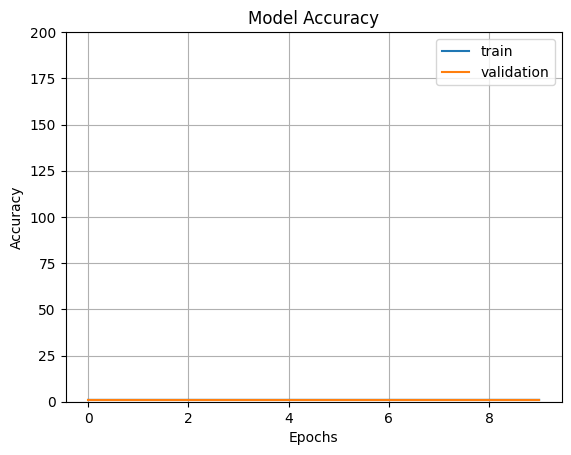

In [ ]:
#Evaluate the ResNet50  model
fig1=plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0, ymax=200)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# Model Inference
# Preprocess the sample image
import cv2
image = cv2.imread(str(roses[0]))
image_resized = cv2.resize(image, (img_height, img_width))
image = np.expand_dims(image_resized, axis=0)

NameError: name 'roses' is not defined

In [ ]:
# Make predictions
image_pred = resnet_model.predict(image)

In [ ]:
# Produce a human-readable output label
image_output_class = class_names[np.argmax(image_pred)]
print("The predicted class is", image_output_class)